<a href="https://colab.research.google.com/github/mrranjbari/thesis/blob/main/MR_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# نصب کتابخانه‌های مورد نیاز

In [30]:
!pip install pandas numpy scikit-learn  matplotlib seaborn

# آماده کردن ابزارها

In [31]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#ایجاد دیتاست فیک


In [32]:
# تعداد داده‌ها
num_samples = 1000

# ویژگی‌ های کشاورزان
data = {
    'age': np.random.randint(20, 70, num_samples),  # سن
    'education': np.random.randint(1, 5, num_samples),  # تحصیلات (1 تا 4)
    'influence': np.random.randint(1, 10, num_samples),  # تاثیرپذیری از همسایه (1 تا 10)
    'risky': np.random.randint(1, 10, num_samples),  # ریسک‌پذیری (1 تا 10)
    'ethics': np.random.randint(1, 10, num_samples),  # نگرش اخلاقی (1 تا 10)
    'trust_to_goverment': np.random.randint(1, 10, num_samples),  # اعتماد به دولت (1 تا 10)
    'control_new_work': np.random.randint(1, 10, num_samples),  # کنترل انجام کار جدید (1 تا 10)
    'scale': np.random.choice(['small', 'medium', 'large'], num_samples)  # مقیاس کشاورز
}

# تبدیل به DataFrame
df = pd.DataFrame(data)

# تعیین رفتار کشاورز (0: نمی‌ فروشه، 1: می‌ فروشه)
df['sell_water'] = np.where(
    (df['age'] > 50) & (df['education'] > 2) & (df['risky'] > 5), 1, 0
)

df.head()


,age,education,influence,risky,ethics,trust_to_goverment,control_new_work,scale,sell_water
0,58,4,8,9,2,6,1,medium,1
1,47,2,5,8,2,8,8,small,0
2,48,2,6,9,7,1,3,large,0
3,34,1,1,9,9,3,8,large,0
4,52,2,9,1,7,3,3,medium,0


#پیش پردازش داده ها

In [33]:
# تبدیل ویژگی‌ های دسته‌بندی به عددی
df = pd.get_dummies(df, columns=['scale'], drop_first=True)

# تقسیم داده‌ها به ویژگی‌ها و برچسب های مورد نظر
X = df.drop('sell_water', axis=1)
y = df['sell_water']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#آموزش مدل یادگیری ماشین

In [34]:
# آموزش مدل با Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#ارزیابی مدل

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# نمایش چند نمونه از پیش‌بینی‌ها
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
predictions.head()


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        21

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[279   0]
 [  0  21]]


,Actual,Predicted
993,0,0
859,0,0
298,0,0
553,0,0
672,0,0


# رسم confusion matrix به صورت تصویری

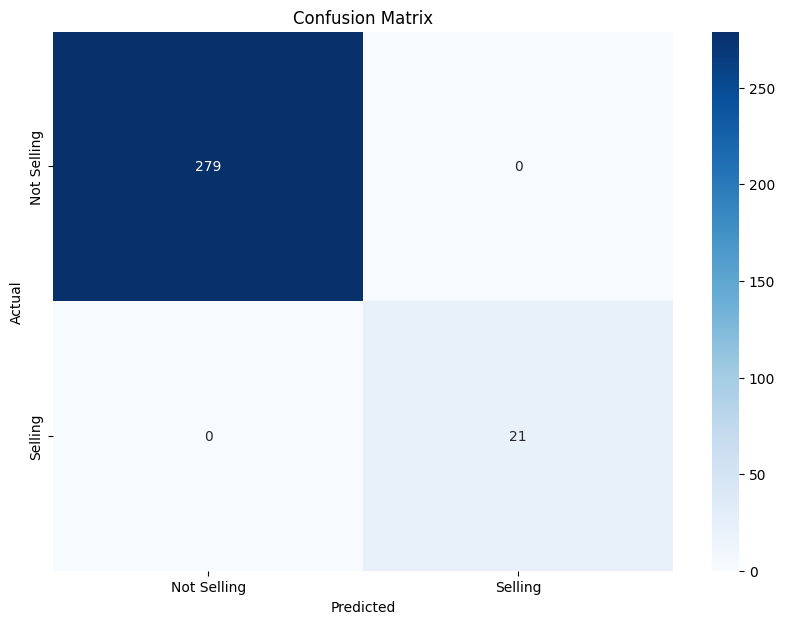

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Selling', 'Selling'], yticklabels=['Not Selling', 'Selling'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
